In [54]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import WormFunctions as wrm
import seaborn as sns

from importlib import reload 
sns.set_theme(style='white')

In [56]:
def calc_locus_value(genotype, locus, population):
    which=genotype[:,locus]
    gen=genotype[which==2]
    t,g=np.shape(population)
    res_array=[]
    for i in range (t):
        pt=population[i]
        res=(pt[which==2])
        res_array.append(np.sum(res)/np.sum(pt))
    return (res_array)

In [58]:
def Get_mutant_array(name, R,N):
    population_array=[]
    mutant_array=[]
    for i in range (R):
        this_name=name+str(N)+'_i'+str(i)
        hermaphrodites=np.load(this_name+'dynamics_h.npy')  
        males=np.load(this_name+'dynamics_m.npy')  
        population=hermaphrodites+males
        population_array.append(population)
        ll=[]
        for j in range (6):
            l=calc_locus_value(utility_function.genotypes,j, population)
            #print ('this is l', l)
            ll.append(l)
        mutant_array.append(np.sum(ll, 0))
    return(mutant_array)


In [60]:
wrm=reload(wrm)
name='Figs'
N=1
loci=6
mutation_rate=0.0001  #carefull with this - this is per genome, not locus! Is divided by 
initial_male_fraction=0.2
mean_selfing_offspring_num=300
mean_sexrep_offspring_num=1000
sex_asex_reproduction_ratio=0.1
cost_vector=[0.05, 0.05,0.05,0.1,0.2,0.3]
benefit_vector=[0.5,0.5,0.5,3,3,3]
dominance = 0  #0 for recessive, 1 for dominant, in between possible
concentration_gradient=np.zeros(20)
concentration_gradient=[0.0000,0.1,0.2,0.4,0.8,1,1.5,2,2.5,3,4,5,6,8,10,12,15]


cycle_length=4
cycle_number=len(concentration_gradient)

increase_determinant=30
utility_function=wrm.Utility(loci, dominance, cost_vector,benefit_vector, max(concentration_gradient))


all loci are recessive
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1.]]
genotypes [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 2.]
 ...
 [2. 2. 2. 2. 2. 0.]
 [2. 2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 2. 2.]]
phenotypes [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1.]]


# Normal experiment

In [63]:
name='NewJacqExp/NewJacqExp'
n=41
R=100

In [65]:
mut_array200=Get_mutant_array(name, R,200)
mean_mut200=np.mean(mut_array200,0)
std_mut200=np.std(mut_array200,0)

mut_array1000=Get_mutant_array(name, R,1000)
mean_mut1000=np.mean(mut_array1000,0)
std_mut1000=np.std(mut_array1000,0)

mut_array2000=Get_mutant_array(name, R,2000)
mean_mut2000=np.mean(mut_array2000,0)
std_mut2000=np.std(mut_array2000,0)

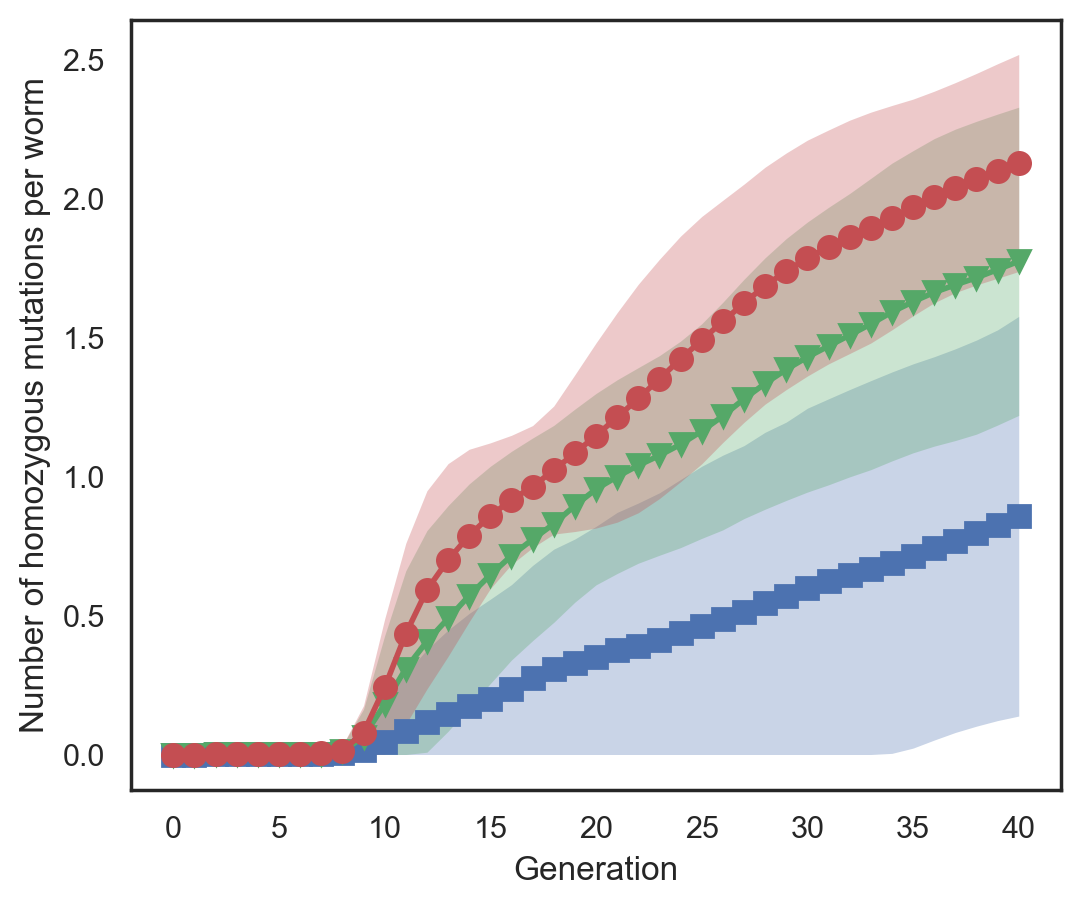

In [66]:
sns.set_theme(style='white')
fig1, ax1 = plt.subplots(dpi=200, figsize=(6, 5))
line_mean_m_200, =plt.plot(range(n),mean_mut200, '-bs',linewidth=2,markersize=8 )
fill_m_200 = plt.fill_between(range(n), np.maximum(0, mean_mut200 - std_mut200), mean_mut200 + std_mut200, alpha=0.3, color='b', linewidth=0, label='Standard Deviation')

line_mean_m_1000, =plt.plot(range(n),mean_mut1000, '-gv',linewidth=2,markersize=8 )
fill_m_1000 = plt.fill_between(range(n), np.maximum(0, mean_mut1000 - std_mut1000), mean_mut1000 + std_mut1000, alpha=0.3, color='g', linewidth=0, label='Standard Deviation')

line_mean_m_2000, =plt.plot(range(n),mean_mut2000, '-ro',linewidth=2,markersize=8 )
fill_m_2000 = plt.fill_between(range(n), np.maximum(0, mean_mut2000 - std_mut2000), mean_mut2000 + std_mut2000, alpha=0.3, color='r', linewidth=0, label='Standard Deviation')


plt.ylabel('Number of homozygous mutations per worm', fontsize=12)
plt.xlabel('Generation', fontsize=12)
plt.savefig(name+'00MutNumX_All2.png',dpi=200, bbox_inches='tight')

# Extended experiment

In [69]:
name='ExtendedJacqExp/ExtendedJacqExp'
n=81
R=50

In [71]:
mut_array200=Get_mutant_array(name, R,200)
mean_mut200=np.mean(mut_array200,0)
std_mut200=np.std(mut_array200,0)

mut_array1000=Get_mutant_array(name, R,1000)
mean_mut1000=np.mean(mut_array1000,0)
std_mut1000=np.std(mut_array1000,0)

mut_array2000=Get_mutant_array(name, R,2000)
mean_mut2000=np.mean(mut_array2000,0)
std_mut2000=np.std(mut_array2000,0)

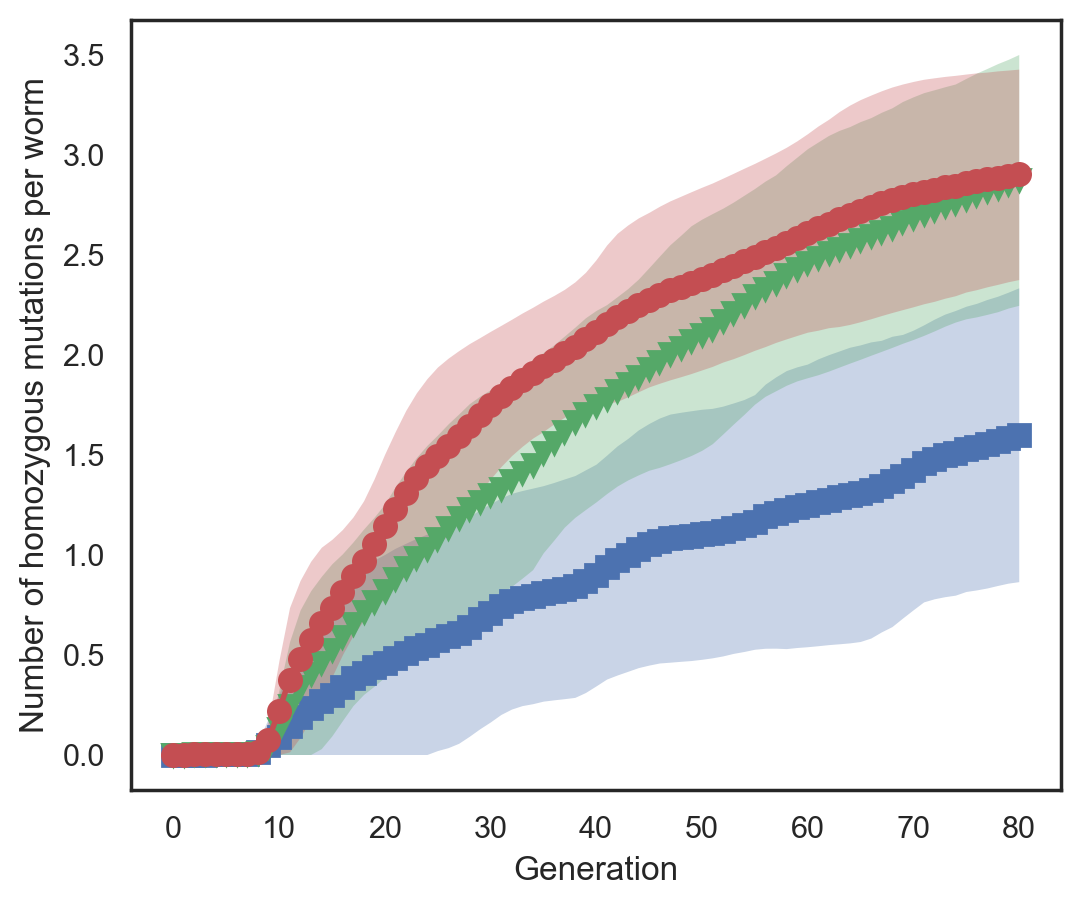

In [73]:
sns.set_theme(style='white')
fig1, ax1 = plt.subplots(dpi=200, figsize=(6, 5))
line_mean_m_200, =plt.plot(range(n),mean_mut200, '-bs',linewidth=2,markersize=8 )
fill_m_200 = plt.fill_between(range(n), np.maximum(0, mean_mut200 - std_mut200), mean_mut200 + std_mut200, alpha=0.3, color='b', linewidth=0, label='Standard Deviation')

line_mean_m_1000, =plt.plot(range(n),mean_mut1000, '-gv',linewidth=2,markersize=8 )
fill_m_1000 = plt.fill_between(range(n), np.maximum(0, mean_mut1000 - std_mut1000), mean_mut1000 + std_mut1000, alpha=0.3, color='g', linewidth=0, label='Standard Deviation')

line_mean_m_2000, =plt.plot(range(n),mean_mut2000, '-ro',linewidth=2,markersize=8 )
fill_m_2000 = plt.fill_between(range(n), np.maximum(0, mean_mut2000 - std_mut2000), mean_mut2000 + std_mut2000, alpha=0.3, color='r', linewidth=0, label='Standard Deviation')


plt.ylabel('Number of homozygous mutations per worm', fontsize=12)
plt.xlabel('Generation', fontsize=12)
plt.savefig(name+'00MutNumX_All2.png',dpi=200, bbox_inches='tight')

In [74]:
print (name)

ExtendedJacqExp/ExtendedJacqExp
